In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas 

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
pip install numpy pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.shape

(1599, 12)

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [2]:
import matplotlib.pyplot as plt

In [5]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

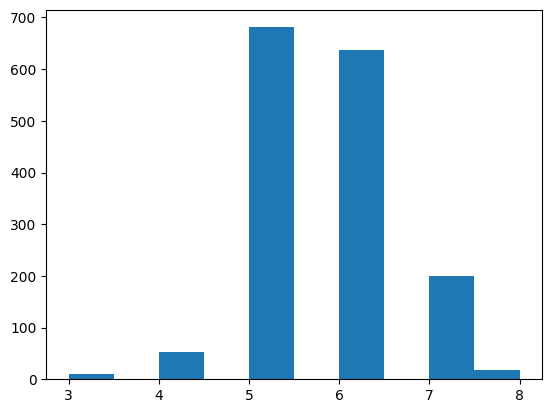

In [21]:
plt.hist(data.quality)

In [12]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import seaborn as sns

<Axes: xlabel='density', ylabel='pH'>

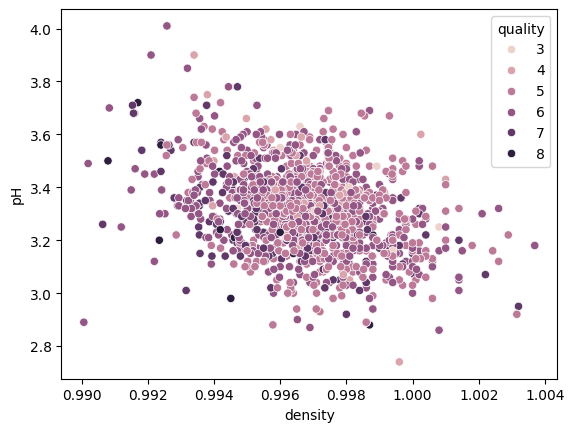

In [19]:
sns.scatterplot(x = "density", y = "pH", hue = "quality", data = data)

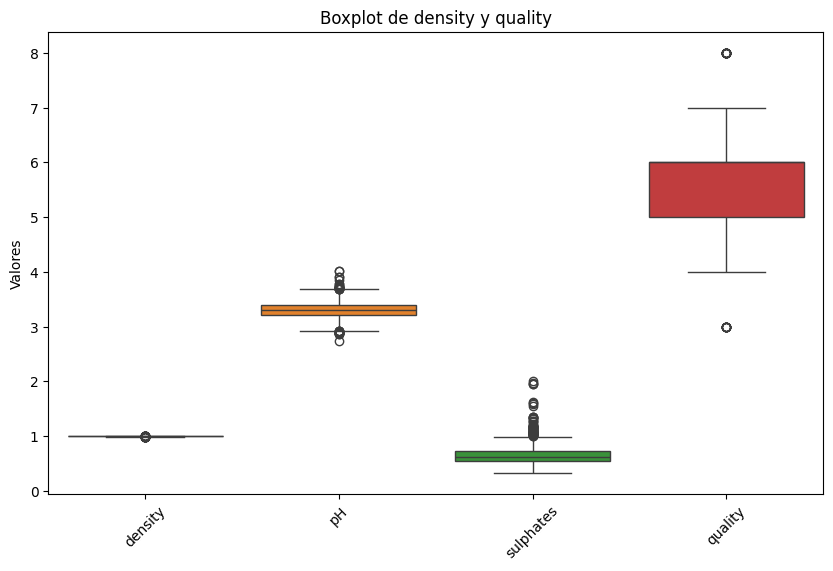

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['density', 'pH', 'sulphates', 'quality']])
plt.xticks(rotation=45)
plt.title('Boxplot de density y quality')
plt.ylabel('Valores')
plt.show()

In [31]:
predictors_col = ["density", "pH", "sulphates"]
target_col = ['quality']

In [32]:
predictors = data[predictors_col]
target = data[target_col]

In [33]:
predictors

,density,pH,sulphates
0,0.99780,3.51,0.56
1,0.99680,3.20,0.68
2,0.99700,3.26,0.65
3,0.99800,3.16,0.58
4,0.99780,3.51,0.56
...,...,...,...
1594,0.99490,3.45,0.58
1595,0.99512,3.52,0.76
1596,0.99574,3.42,0.75
1597,0.99547,3.57,0.71


In [34]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [35]:
corr = predictors.corr()
corr

,density,pH,sulphates
density,1.000000,-0.341699,0.148506
pH,-0.341699,1.000000,-0.196648
sulphates,0.148506,-0.196648,1.000000


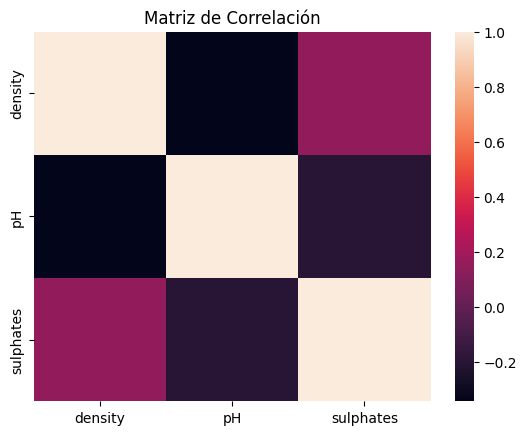

In [36]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [7]:
import pandas as pd

data = pd.read_csv('winequality-red.csv')  # Load your dataset


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('winequality-red.csv')

# Define predictors and target
predictors_col = ["density", "pH", "sulphates"]
target_col = ['quality']
predictors = data[predictors_col]
target = data[target_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)


In [13]:
tree = DecisionTreeClassifier()

In [14]:
arbol = tree.fit(X_train, y_train)

[Text(0.37671721803940983, 0.9791666666666666, 'x[2] <= 0.585\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.13979464741951966, 0.9375, 'x[0] <= 0.995\ngini = 0.563\nsamples = 483\nvalue = [6.0, 31.0, 282.0, 145.0, 19.0, 0.0]'),
 Text(0.25825593272946473, 0.9583333333333333, 'True  '),
 Text(0.04713847726111395, 0.8958333333333334, 'x[2] <= 0.525\ngini = 0.658\nsamples = 112\nvalue = [2, 9, 35, 53, 13, 0]'),
 Text(0.010219724067450179, 0.8541666666666666, 'x[0] <= 0.993\ngini = 0.672\nsamples = 54\nvalue = [2, 4, 24, 18, 6, 0]'),
 Text(0.0061318344404701075, 0.8125, 'x[2] <= 0.395\ngini = 0.219\nsamples = 8\nvalue = [0, 0, 0, 7, 1, 0]'),
 Text(0.004087889626980072, 0.7708333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.008175779253960144, 0.7708333333333334, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 7, 0, 0]'),
 Text(0.01430761369443025, 0.8125, 'x[1] <= 3.055\ngini = 0.649\nsamples = 46\nvalue = [2, 4, 24, 11, 5,

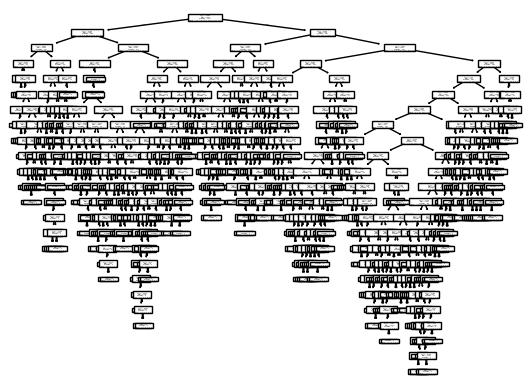

In [15]:
plot_tree(arbol)

In [16]:
predicciones = arbol.predict(X_test)

In [17]:
predicciones

array([5, 6, 5, 5, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 6, 6, 5, 5, 5, 6,
       7, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 5, 7, 6, 6, 6,
       5, 7, 6, 7, 5, 6, 5, 4, 7, 5, 7, 6, 6, 5, 6, 5, 7, 6, 5, 6, 7, 7,
       6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 6, 6, 7, 5,
       5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 7, 5, 4, 5, 7,
       6, 7, 6, 7, 5, 6, 5, 7, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 7, 6, 5,
       4, 7, 4, 5, 7, 5, 6, 7, 6, 5, 5, 5, 7, 5, 7, 5, 5, 4, 5, 6, 6, 5,
       5, 5, 5, 5, 6, 6, 7, 7, 6, 5, 4, 5, 5, 4, 6, 6, 5, 5, 5, 7, 5, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 5, 7,
       5, 7, 6, 6, 5, 6, 5, 5, 5, 7, 6, 7, 5, 6, 7, 6, 6, 5, 7, 5, 6, 6,
       5, 5, 5, 6, 6, 3, 5, 5, 6, 5, 5, 5, 7, 7, 5, 7, 5, 5, 6, 5, 5, 5,
       6, 5, 6, 7, 7, 6, 7, 5, 5, 5, 5, 6, 6, 4, 5, 6, 4, 6, 6, 5, 6, 6,
       6, 7, 6, 7, 5, 6, 5, 6, 5, 5, 6, 5, 5, 4, 6,

In [18]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

NameError: name 'np' is not defined

In [19]:
import numpy as np

In [20]:
import pandas as pd

In [21]:
import numpy as np
import pandas as pd

# Assuming y_test and predicciones are already defined
confusion_matrix = pd.crosstab(
    np.array([y[0] for y in y_test.values.tolist()]),
    predicciones,
    rownames=['Actual'],
    colnames=['Predicciones']
)

print(confusion_matrix)

Predicciones  3  4   5   6   7
Actual                        
3             0  0   0   1   0
4             0  1   6   1   0
5             0  1  94  38  13
6             1  9  24  72  18
7             0  1   9   7  18
8             0  0   1   1   4


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.578125

In [26]:
from sklearn.metrics import precision_score

In [27]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

C:\Users\Felipe Herreño\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.5917855298976813

In [29]:
from sklearn.metrics import recall_score

In [30]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.578125

In [32]:
from sklearn.metrics import f1_score

In [33]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5822721284862677